# Dimensionality Reduction

Here we show some aspects of the data and do some basic statistical analysis and demonsionality reduction.

In [2]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Path to your working directory to store the images
data_path = "/Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/data/ai_ready/" # This is an example, change it to your own path

In [3]:
blendDEM = rxr.open_rasterio(data_path + "blendDEM_aiready.tif", cache=False)
blendSLOPE = rxr.open_rasterio(data_path + "blendSLOPE_aiready.tif", cache=False)

ctxDEM = rxr.open_rasterio(data_path + "ctxDEM_aiready.tif", cache=False)
ctxIMG = rxr.open_rasterio(data_path + "ctxIMG_aiready.tif", cache=False)
ctxSLOPE = rxr.open_rasterio(data_path + "ctxSLOPE_aiready.tif", cache=False)

dayIR = rxr.open_rasterio(data_path + "dayIR_aiready.tif", cache=False)
nightIR = rxr.open_rasterio(data_path + "nightIR_aiready.tif", cache=False)

hrscND = rxr.open_rasterio(data_path + "hrscND_aiready.tif", cache=False)
hrscP1 = rxr.open_rasterio(data_path + "hrscP1_aiready.tif", cache=False)
hrscP2 = rxr.open_rasterio(data_path + "hrscP2_aiready.tif", cache=False)
hrscS1 = rxr.open_rasterio(data_path + "hrscS1_aiready.tif", cache=False)
hrscS2 = rxr.open_rasterio(data_path + "hrscS2_aiready.tif", cache=False)

training_imgs = [blendDEM, blendSLOPE, ctxDEM, ctxIMG, ctxSLOPE, dayIR, nightIR, hrscND, hrscP1, hrscP2, hrscS1, hrscS2]
training_names = ['blendDEM', 'blendSLOPE', 'ctxDEM', 'ctxIMG', 'ctxSLOPE', 'dayIR', 'nightIR', 'hrscND', 'hrscP1', 'hrscP2', 'hrscS1', 'hrscS2']

for img, name in zip(training_imgs, training_names):
    length, width = img.shape[1], img.shape[2]
    print(f"Size of {name}: {length} x {width}, Total size: {img.size}")

Size of blendDEM: 2873 x 3048, Total size: 8756904
Size of blendSLOPE: 2873 x 3048, Total size: 8756904
Size of ctxDEM: 2873 x 3048, Total size: 8756904
Size of ctxIMG: 2873 x 3048, Total size: 8756904
Size of ctxSLOPE: 2873 x 3048, Total size: 8756904
Size of dayIR: 2873 x 3048, Total size: 8756904
Size of nightIR: 2873 x 3048, Total size: 8756904
Size of hrscND: 2873 x 3048, Total size: 8756904
Size of hrscP1: 2873 x 3048, Total size: 8756904
Size of hrscP2: 2873 x 3048, Total size: 8756904
Size of hrscS1: 2873 x 3048, Total size: 8756904
Size of hrscS2: 2873 x 3048, Total size: 8756904


## Principle Component Analysis

Here we stack all of the images together and do a principal component analysis to see what features appear to be common in all 14 images.

In [4]:
# Stack images into a 3D array
stacked_imgs = np.stack([img.values[0] for img in training_imgs], axis=2)

# Flatten each layer
n_samples, n_features = stacked_imgs.shape[0] * stacked_imgs.shape[1], stacked_imgs.shape[2]
flattened_imgs = stacked_imgs.reshape(n_samples, n_features)

# Perform PCA
n_components = 3  # Number of principal components to keep
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(flattened_imgs)

# Reshape the components back to 2D
reshaped_components = [pca_result[:, i].reshape(stacked_imgs.shape[:2]) for i in range(n_components)]

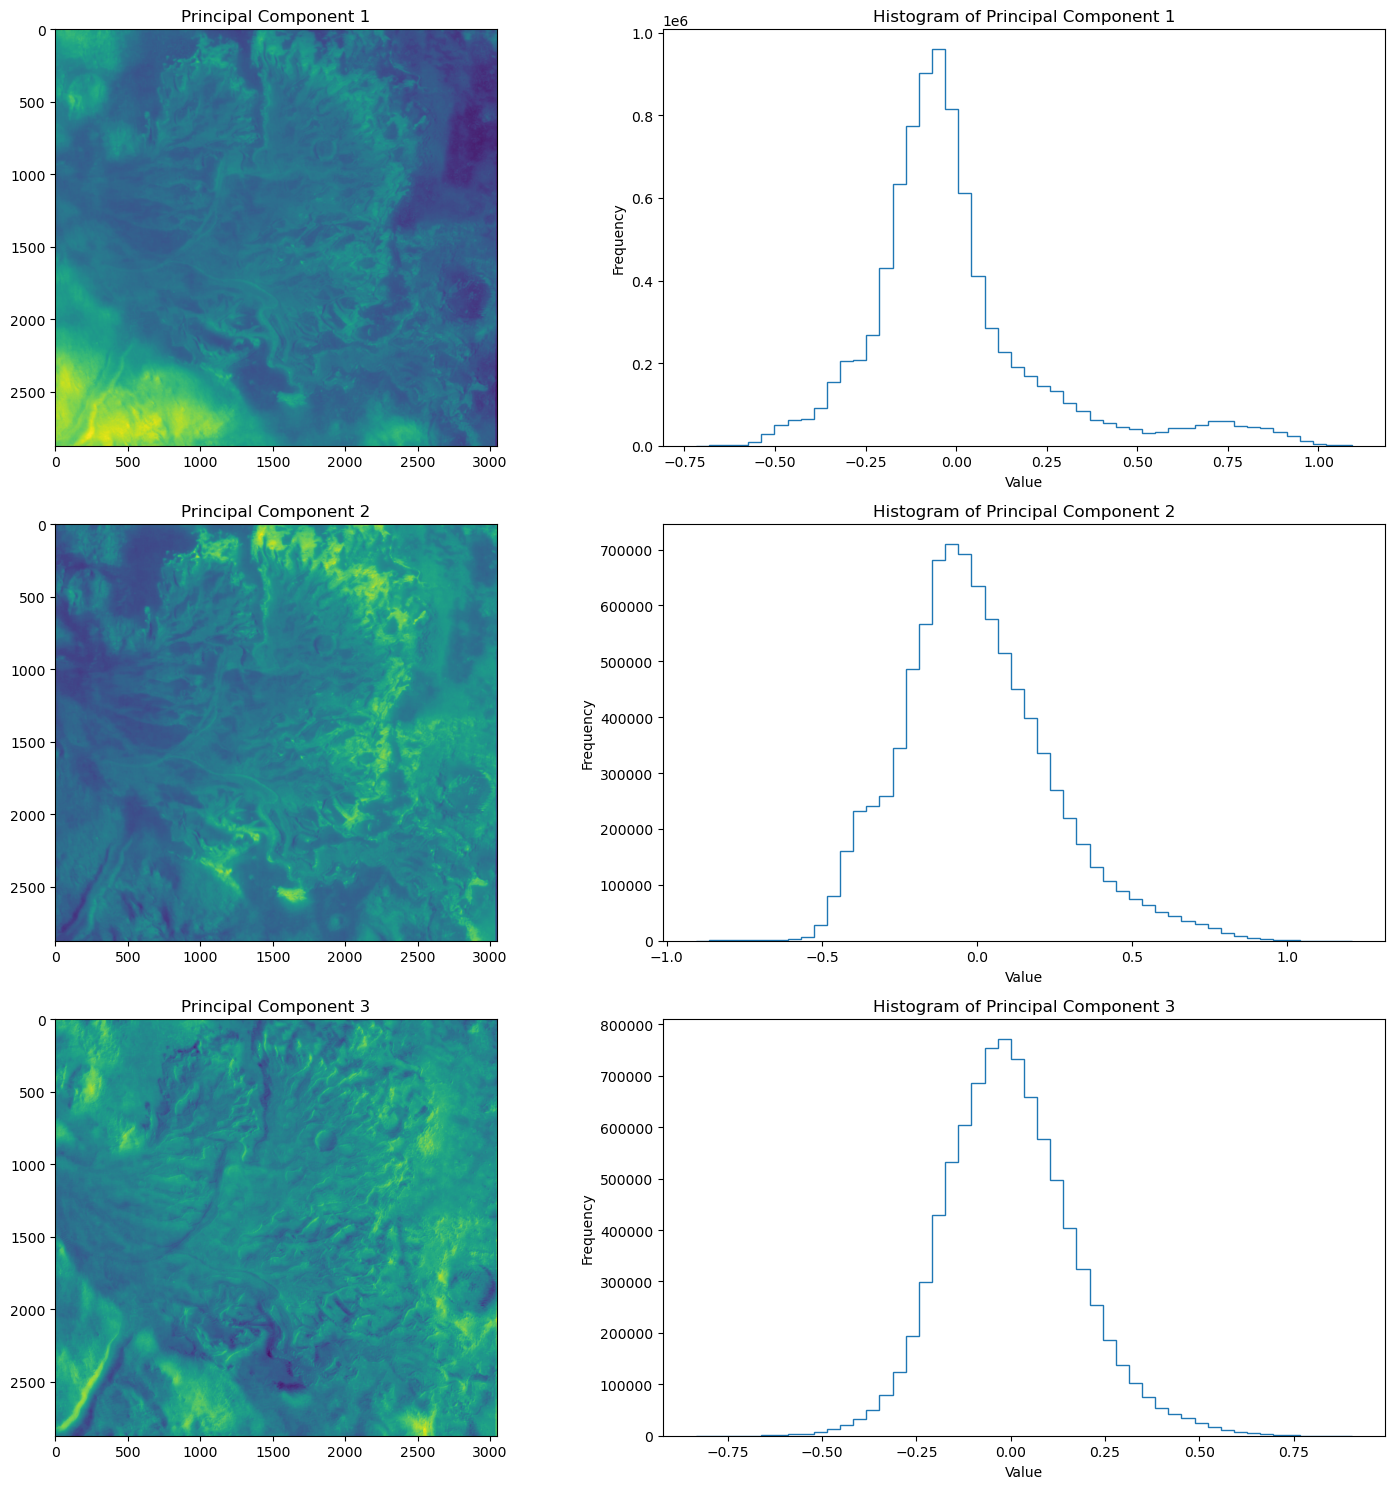

In [5]:
# Plot the principal components and their histograms
fig, axes = plt.subplots(n_components, 2, figsize=(15, 5 * n_components))

for i in range(n_components):
    # Plot the principal component image
    axes[i, 0].imshow(reshaped_components[i], cmap='viridis')
    axes[i, 0].set_title(f'Principal Component {i + 1}')

    # Plot the histogram of the principal component
    data_values = reshaped_components[i].flatten()
    n, bins = np.histogram(data_values, bins=50)
    axes[i, 1].stairs(n, bins)
    axes[i, 1].set_title(f'Histogram of Principal Component {i + 1}')
    axes[i, 1].set_xlabel("Value")
    axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**PC1** appears to mostly identify the highest elevation part of the image in the bottom left corner.

**PC2** appears to identify the rough terrain at the end of the fan lobe and some of the fan channels.

**PC3** appears to identify all of the area that is not in the fan. That's great!